# iqr

Use the "Run" button to execute the code.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 1 to 12357
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7590 non-null   datetime64[ns]
 1   PM2.5       7590 non-null   float64       
 2   PM10        7590 non-null   float64       
 3   NO2         7590 non-null   float64       
 4   CO          7590 non-null   float64       
 5   SO2         7590 non-null   float64       
 6   O3          7590 non-null   float64       
 7   AQI         7590 non-null   float64       
 8   AQI_Bucket  7590 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 593.0+ KB
        Date   PM2.5    PM10     NO2    CO    SO2     O3    AQI AQI_Bucket
1 2018-11-12  238.43  348.91   78.95  1.53  14.38  45.31  404.0     Severe
2 2018-11-13  284.83  427.40  112.54  1.43  21.33  30.40  406.0     Severe
3 2018-11-14  150.41  214.16   96.17  0.99  12.74  41.87  372.0  Ve

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


After the outliers have been dealt with, the graphs are as follows:  
Lower Fence; -189.58749999999995
Upper Fence: 659.3924999999999
Total number of outliers are left: 73
Lower Fence; -122.45375000000001
Upper Fence: 331.61625000000004
Total number of outliers are left: 230
Lower Fence; -29.47
Upper Fence: 104.53
Total number of outliers are left: 347
Lower Fence; -41.08875000000002
Upper Fence: 131.28125000000003
Total number of outliers are left: 217
Lower Fence; -10.31875
Upper Fence: 36.11125
Total number of outliers are left: 140
Lower Fence; -0.8799999999999997
Upper Fence: 3.5999999999999996
Total number of outliers are left: 374


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'SO2')

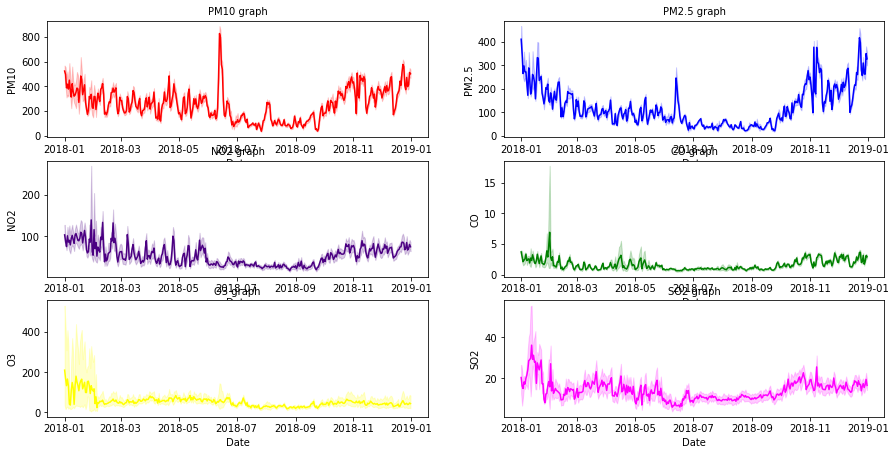

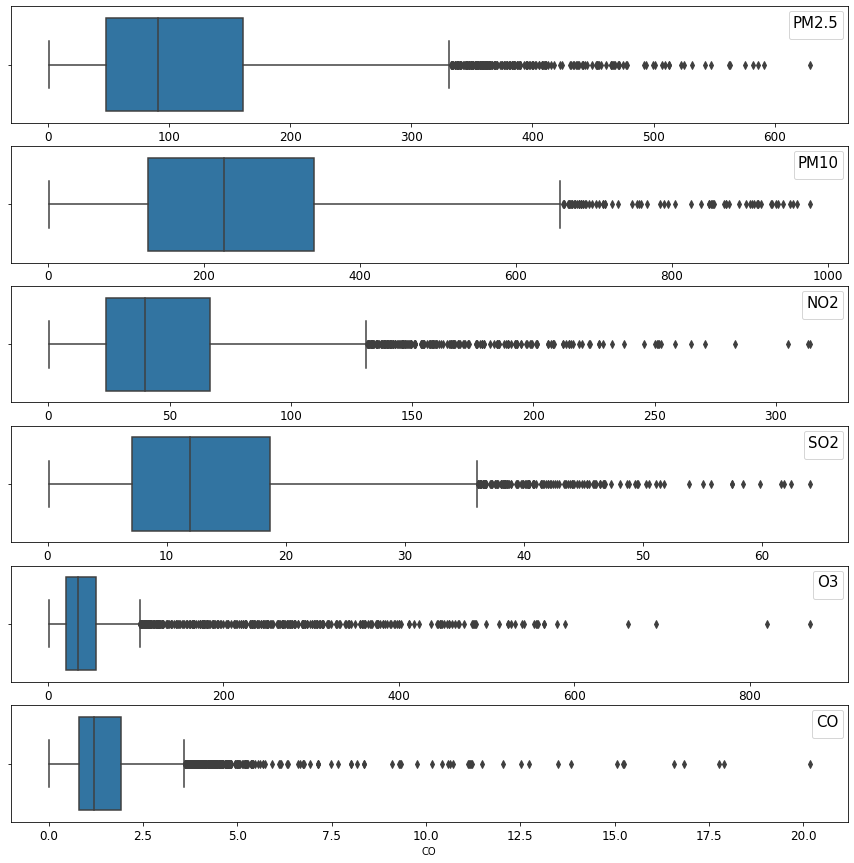

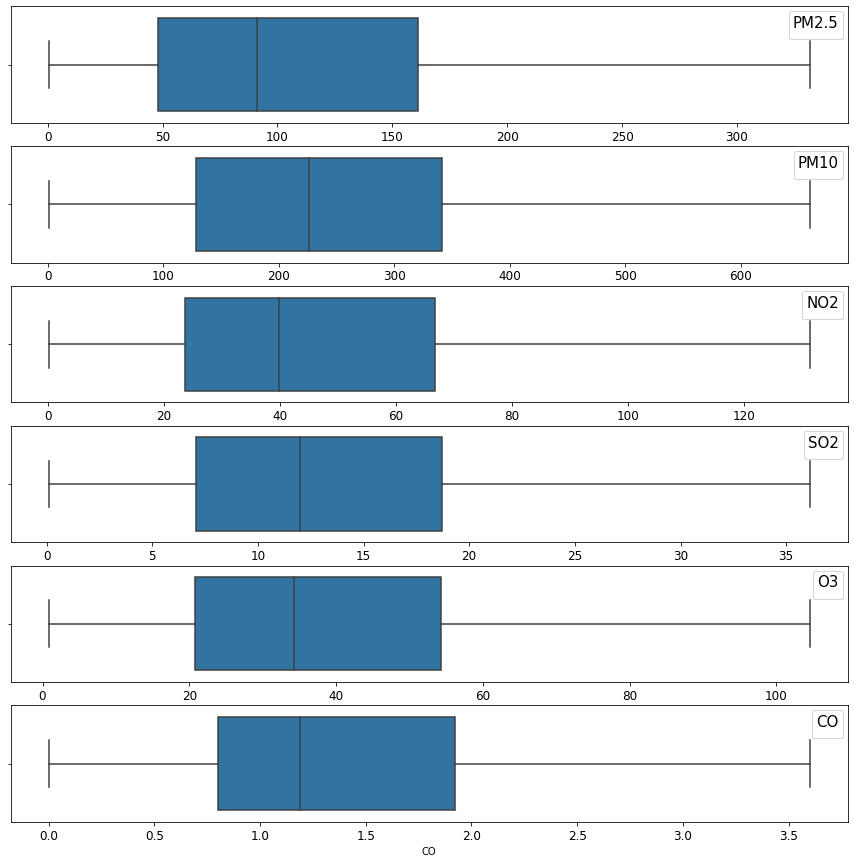

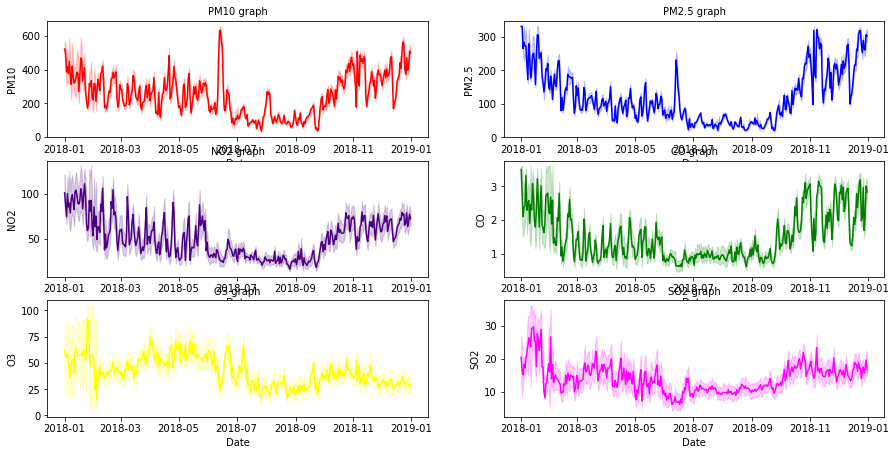

In [1]:
#IQR -interquartile range


import csv
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request  import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv','2018.csv')
df = pd.read_csv('2018.csv')
df.head()
df.dtypes
df.drop(['StationId','NO','NOx','NH3','Benzene','Xylene','Toluene'],axis =1,inplace = True)
df =  df.dropna()
df['Date'] = pd.to_datetime(df.Date)
df.info()
df.describe()
print(df.head())
df.shape


plt.figure(figsize =(15,15))
plt.subplot(6,2,1)
sns.lineplot(x=df.Date,y= df.PM10,color ='red')
plt.title("PM10 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('PM10')
plt.subplot(6,2,2)
sns.lineplot(x=df.Date,y= df['PM2.5'],color ='blue')
plt.title("PM2.5 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.subplot(6,2,3)
sns.lineplot(x=df.Date,y= df.NO2,color ='indigo')
plt.title("NO2 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('NO2')
plt.subplot(6,2,4)
sns.lineplot(x=df.Date,y= df.CO,color ='green')
plt.title("CO graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('CO')
plt.subplot(6,2,5)
sns.lineplot(x=df.Date,y= df.O3,color ='yellow')
plt.title("O3 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('O3')
plt.subplot(6,2,6)
sns.lineplot(x=df.Date,y= df.SO2,color ='fuchsia')
plt.title("SO2 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('SO2')


plt.figure(figsize=(15,15))
plt.subplot(6,1,1)
sns.boxplot(df['PM2.5'])
plt.xticks(fontsize = (12))
plt.xlabel('PM2.5')
plt.legend (title="PM2.5", fontsize=10, title_fontsize=15)
plt.subplot(6,1,2)
sns.boxplot(df['PM10'])
plt.xticks(fontsize = (12))
plt.xlabel('PM10')
plt.legend (title="PM10", fontsize=10, title_fontsize=15)
plt.subplot(6,1,3)
sns.boxplot(df['NO2'])
plt.xticks(fontsize = (12))
plt.xlabel('NO2')
plt.legend (title="NO2", fontsize=10, title_fontsize=15)
plt.subplot(6,1,4)
sns.boxplot(df['SO2'])
plt.xticks(fontsize = (12))
plt.xlabel('SO2')
plt.legend (title="SO2", fontsize=10, title_fontsize=15)
plt.subplot(6,1,5)
sns.boxplot(df['O3'])
plt.xticks(fontsize = (12))
plt.xlabel('O3')
plt.legend (title="O3", fontsize=10, title_fontsize=15)
plt.subplot(6,1,6)
sns.boxplot(df['CO'])
plt.xticks(fontsize = (12))
plt.xlabel('CO')
plt.legend (title="CO", fontsize=10, title_fontsize=15)
       
print("After the outliers have been dealt with, the graphs are as follows:  ")

def identifying_and_treating_outlier(df,col,remove_or_fill_with_quartile):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_fence=q1-1.5*(iqr)
    upper_fence=q3+1.5*(iqr)
    print('Lower Fence;', lower_fence)
    print('Upper Fence:', upper_fence)
    print('Total number of outliers are left:', df[df[col] > upper_fence].shape[0])

    if remove_or_fill_with_quartile=="drop":
        df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
        df.drop(df.loc[df[col]>upper_fence].index,inplace=True)     
    elif remove_or_fill_with_quartile=="fill":
            df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
            df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])


identifying_and_treating_outlier(df,'PM10','fill')
identifying_and_treating_outlier(df,'PM2.5','fill')
identifying_and_treating_outlier(df,'O3','fill')
identifying_and_treating_outlier(df,'NO2','fill')
identifying_and_treating_outlier(df,'SO2','fill')
identifying_and_treating_outlier(df,'CO','fill')            


plt.figure(figsize=(15,15))
plt.subplot(6,1,1)
sns.boxplot(df['PM2.5'])
plt.xticks(fontsize = (12))
plt.xlabel('PM2.5')
plt.legend (title="PM2.5", fontsize=10, title_fontsize=15)
plt.subplot(6,1,2)
sns.boxplot(df['PM10'])
plt.xticks(fontsize = (12))
plt.xlabel('PM10')
plt.legend (title="PM10", fontsize=10, title_fontsize=15)
plt.subplot(6,1,3)
sns.boxplot(df['NO2'])
plt.xticks(fontsize = (12))
plt.xlabel('NO2')
plt.legend (title="NO2", fontsize=10, title_fontsize=15)
plt.subplot(6,1,4)
sns.boxplot(df['SO2'])
plt.xticks(fontsize = (12))
plt.xlabel('SO2')
plt.legend (title="SO2", fontsize=10, title_fontsize=15)
plt.subplot(6,1,5)
sns.boxplot(df['O3'])
plt.xticks(fontsize = (12))
plt.xlabel('O3')
plt.legend (title="O3", fontsize=10, title_fontsize=15)
plt.subplot(6,1,6)
sns.boxplot(df['CO'])
plt.xticks(fontsize = (12))
plt.xlabel('CO')
plt.legend (title="CO", fontsize=10, title_fontsize=15)
       
plt.figure(figsize =(15,15))
plt.subplot(6,2,1)
sns.lineplot(x=df.Date,y= df.PM10,color ='red')
plt.title("PM10 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('PM10')
plt.subplot(6,2,2)
sns.lineplot(x=df.Date,y= df['PM2.5'],color ='blue')
plt.title("PM2.5 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.subplot(6,2,3)
sns.lineplot(x=df.Date,y= df.NO2,color ='indigo')
plt.title("NO2 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('NO2')
plt.subplot(6,2,4)
sns.lineplot(x=df.Date,y= df.CO,color ='green')
plt.title("CO graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('CO')
plt.subplot(6,2,5)
sns.lineplot(x=df.Date,y= df.O3,color ='yellow')
plt.title("O3 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('O3')
plt.subplot(6,2,6)
sns.lineplot(x=df.Date,y= df.SO2,color ='fuchsia')
plt.title("SO2 graph",fontsize = 10)
plt.xlabel('Date')
plt.ylabel('SO2')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 1 to 12357
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7590 non-null   datetime64[ns]
 1   PM2.5       7590 non-null   float64       
 2   PM10        7590 non-null   float64       
 3   NO2         7590 non-null   float64       
 4   CO          7590 non-null   float64       
 5   SO2         7590 non-null   float64       
 6   O3          7590 non-null   float64       
 7   AQI         7590 non-null   float64       
 8   AQI_Bucket  7590 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 593.0+ KB


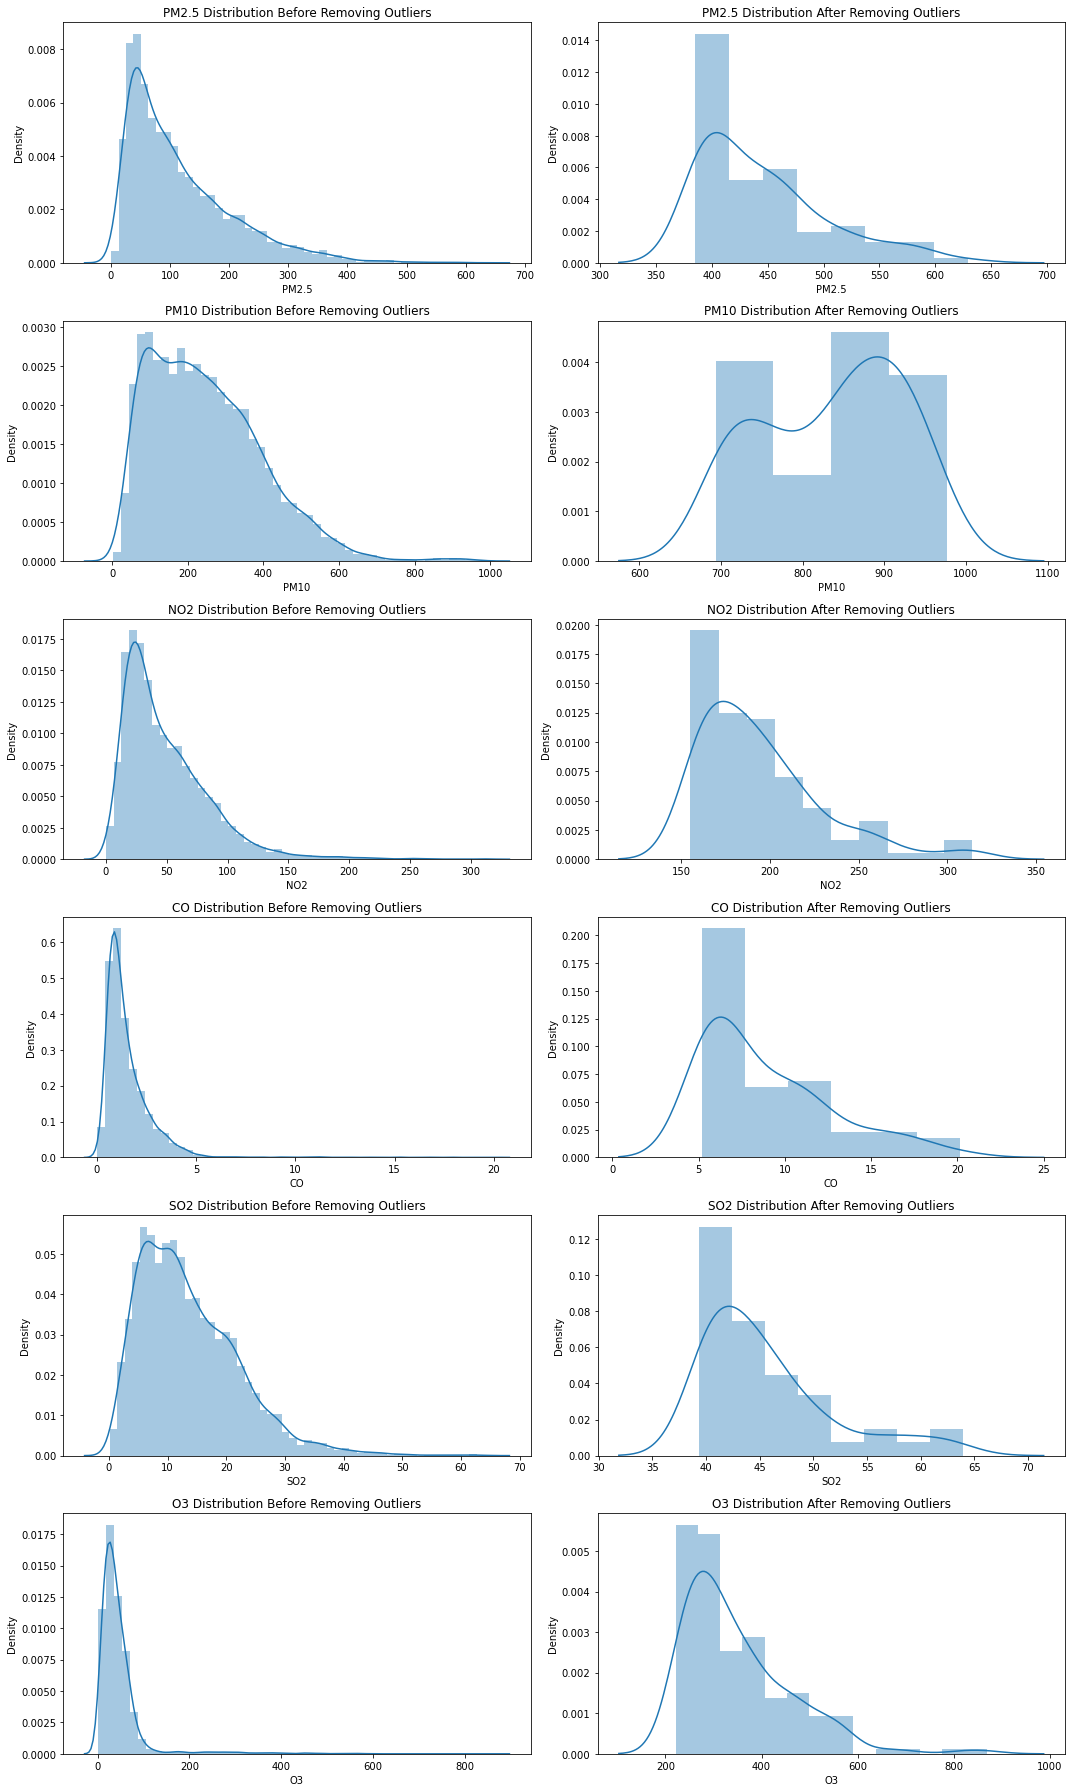

In [2]:
#z-score: Z-Scores help identify outliers by values if a particular data point has a Z-score value
#either less than -3 or greater than +
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request  import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv','2018.csv')
df = pd.read_csv('2018.csv')
df.head()

df.dtypes

df.drop(['StationId','NO','NOx','NH3','Benzene','Xylene','Toluene'],axis =1,inplace = True)
df =  df.dropna()
df['Date'] = pd.to_datetime(df.Date)
df.info()
df.describe()

# calculate z-scores and remove outliers
zr = np.abs(st.zscore(df['PM2.5']))
dfn = df[(zr > 3)]

zw = np.abs(st.zscore(df.PM10))
dfnn = df[(zw > 3)]

za = np.abs(st.zscore(df.NO2))
de = df[(za > 3)]

zb = np.abs(st.zscore(df.CO))
db = df[(zb > 3)]

zc = np.abs(st.zscore(df.SO2))
dc = df[(zc > 3)]

zd = np.abs(st.zscore(df.O3))
dd = df[(zd > 3)]

# plot distributions with and without outliers for each feature
plt.figure(figsize=(15, 25))

plt.subplot(6, 2, 1)
sns.distplot(df['PM2.5'])
plt.title('PM2.5 Distribution Before Removing Outliers')

plt.subplot(6, 2, 2)
sns.distplot(dfn['PM2.5'])
plt.title('PM2.5 Distribution After Removing Outliers')

plt.subplot(6, 2, 3)
sns.distplot(df['PM10'])
plt.title('PM10 Distribution Before Removing Outliers')

plt.subplot(6, 2, 4)
sns.distplot(dfnn['PM10'])
plt.title('PM10 Distribution After Removing Outliers')

plt.subplot(6, 2, 5)
sns.distplot(df['NO2'])
plt.title('NO2 Distribution Before Removing Outliers')

plt.subplot(6, 2, 6)
sns.distplot(de['NO2'])
plt.title('NO2 Distribution After Removing Outliers')

plt.subplot(6, 2, 7)
sns.distplot(df['CO'])
plt.title('CO Distribution Before Removing Outliers')

plt.subplot(6, 2, 8)
sns.distplot(db['CO'])
plt.title('CO Distribution After Removing Outliers')

plt.subplot(6, 2, 9)
sns.distplot(df['SO2'])
plt.title('SO2 Distribution Before Removing Outliers')

plt.subplot(6, 2, 10)
sns.distplot(dc['SO2'])
plt.title('SO2 Distribution After Removing Outliers')

plt.subplot(6, 2, 11)
sns.distplot(df['O3'])
plt.title('O3 Distribution Before Removing Outliers')

plt.subplot(6, 2, 12)
sns.distplot(dd['O3'])
plt.title('O3 Distribution After Removing Outliers')

plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 1 to 12357
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7590 non-null   datetime64[ns]
 1   PM2.5       7590 non-null   float64       
 2   PM10        7590 non-null   float64       
 3   NO2         7590 non-null   float64       
 4   CO          7590 non-null   float64       
 5   SO2         7590 non-null   float64       
 6   O3          7590 non-null   float64       
 7   AQI         7590 non-null   float64       
 8   AQI_Bucket  7590 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 593.0+ KB


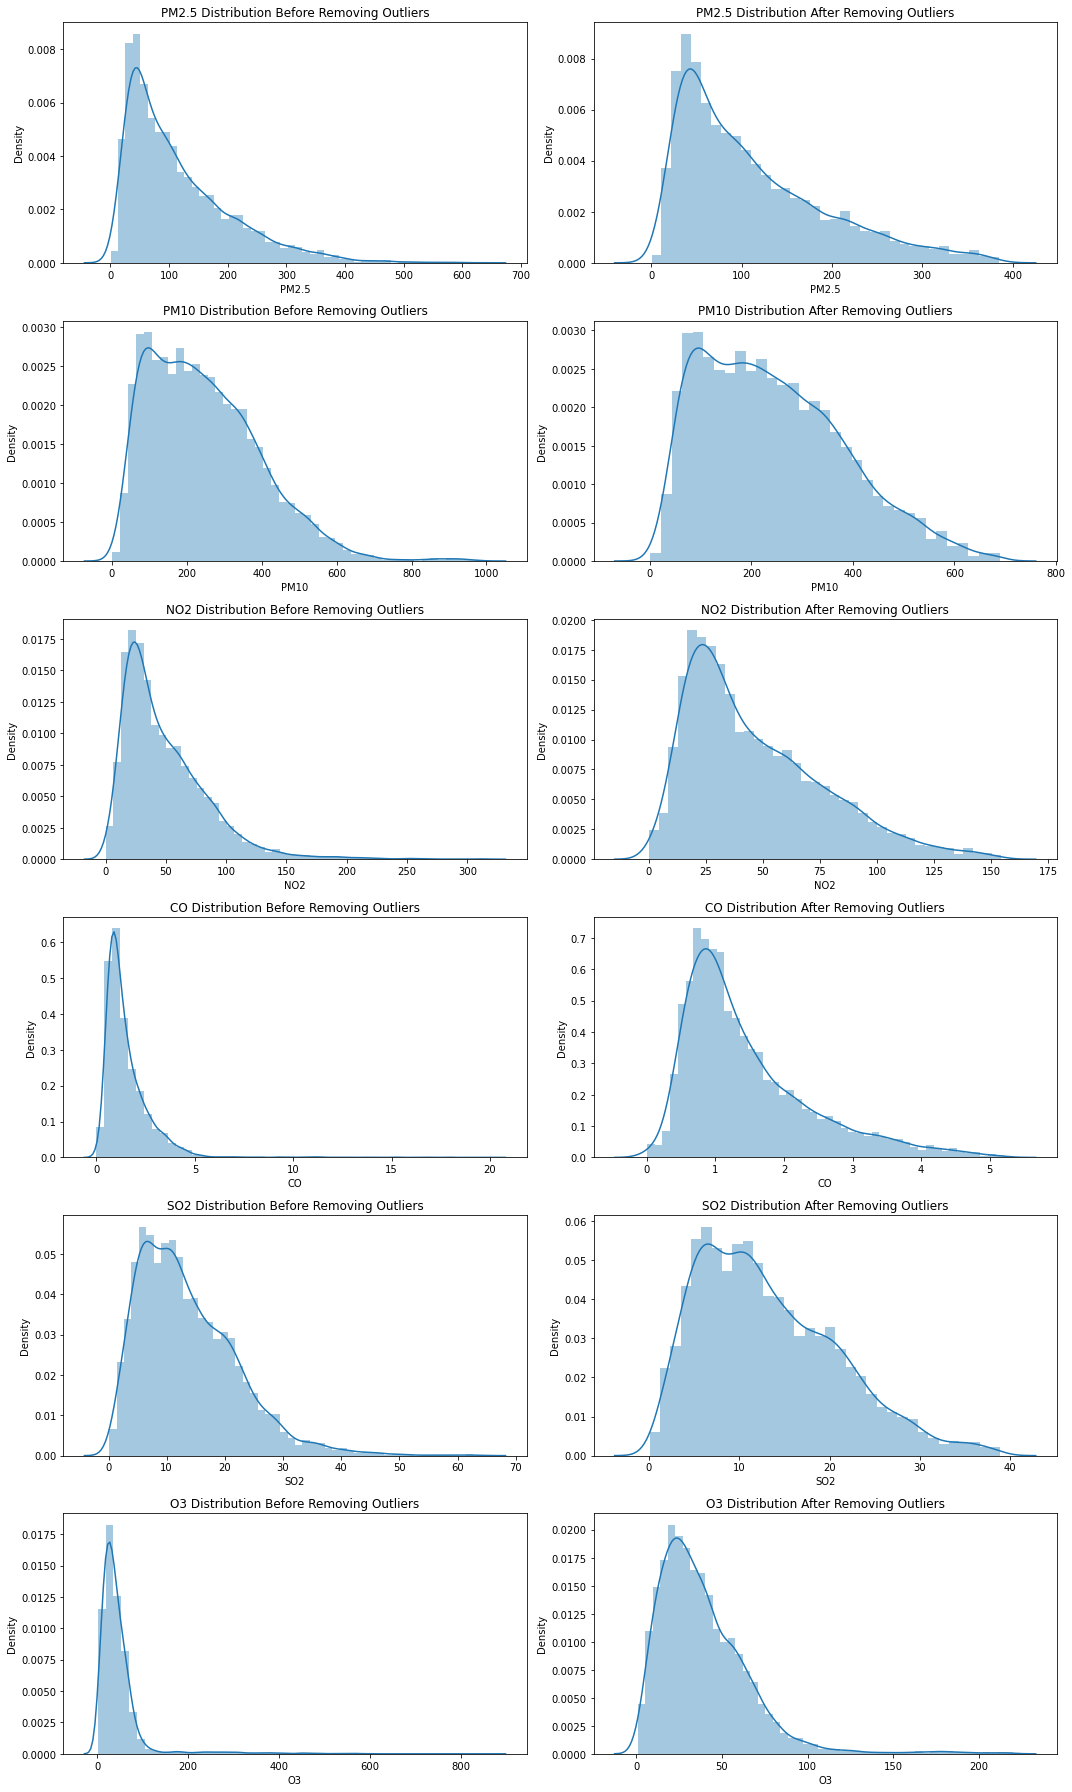

In [3]:
#z-score  <=3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv')
df.head()

df.dtypes

df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)
df = df.dropna()
df['Date'] = pd.to_datetime(df.Date)
df.info()
df.describe()

# calculate z-scores and remove outliers
zr = np.abs(st.zscore(df['PM2.5']))
dfn = df[(zr <= 3)]

zw = np.abs(st.zscore(df.PM10))
dfnn = df[(zw <= 3)]

za = np.abs(st.zscore(df.NO2))
de = df[(za <= 3)]

zb = np.abs(st.zscore(df.CO))
db = df[(zb <= 3)]

zc = np.abs(st.zscore(df.SO2))
dc = df[(zc <= 3)]

zd = np.abs(st.zscore(df.O3))
dd = df[(zd <= 3)]

# plot distributions with and without outliers for each feature
plt.figure(figsize=(15, 25))

plt.subplot(6, 2, 1)
sns.distplot(df['PM2.5'])
plt.title('PM2.5 Distribution Before Removing Outliers')

plt.subplot(6, 2, 2)
sns.distplot(dfn['PM2.5'])
plt.title('PM2.5 Distribution After Removing Outliers')

plt.subplot(6, 2, 3)
sns.distplot(df['PM10'])
plt.title('PM10 Distribution Before Removing Outliers')

plt.subplot(6, 2, 4)
sns.distplot(dfnn['PM10'])
plt.title('PM10 Distribution After Removing Outliers')

plt.subplot(6, 2, 5)
sns.distplot(df['NO2'])
plt.title('NO2 Distribution Before Removing Outliers')

plt.subplot(6, 2, 6)
sns.distplot(de['NO2'])
plt.title('NO2 Distribution After Removing Outliers')

plt.subplot(6, 2, 7)
sns.distplot(df['CO'])
plt.title('CO Distribution Before Removing Outliers')

plt.subplot(6, 2, 8)
sns.distplot(db['CO'])
plt.title('CO Distribution After Removing Outliers')

plt.subplot(6, 2, 9)
sns.distplot(df['SO2'])
plt.title('SO2 Distribution Before Removing Outliers')

plt.subplot(6, 2, 10)
sns.distplot(dc['SO2'])
plt.title('SO2 Distribution After Removing Outliers')

plt.subplot(6, 2, 11)
sns.distplot(df['O3'])
plt.title('O3 Distribution Before Removing Outliers')

plt.subplot(6, 2, 12)
sns.distplot(dd['O3'])
plt.title('O3 Distribution After Removing Outliers')

plt.tight_layout()

MAE: 0.312


Text(0.5, 1.0, 'Identifying Outliers using Local Outlier Factor')

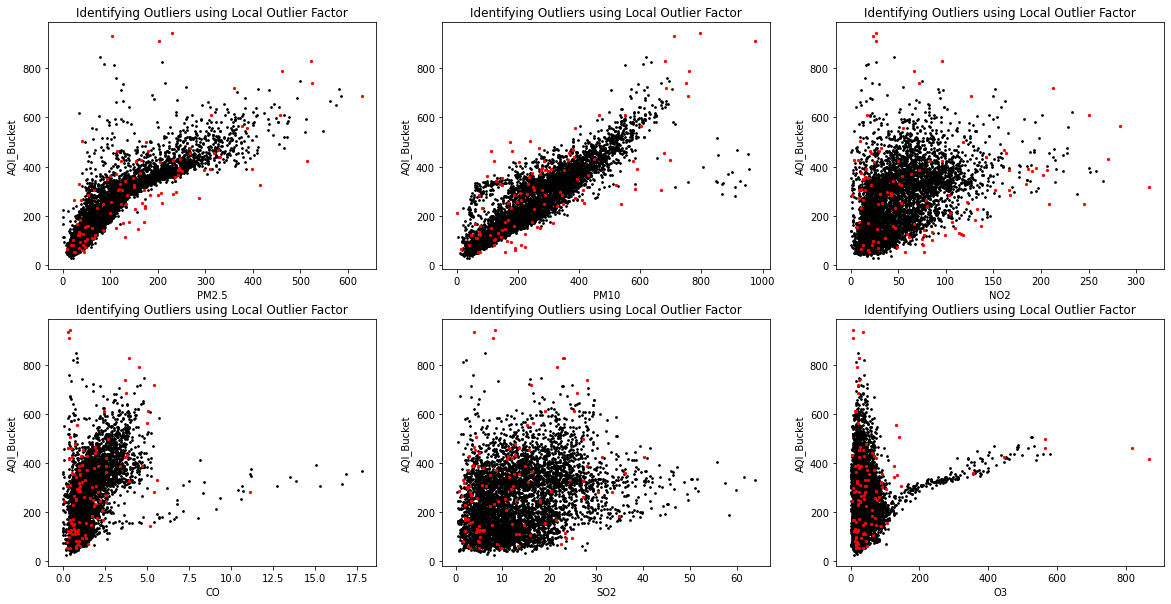

In [4]:
#LOF

import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import warnings
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv')

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene','Date'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)

# Converting the dataframe to numpy array
data = df.values

# Splitting into input and output elements
X, y = data[:, :-1], data[:, -1]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Identifying outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# Selecting all rows that are not outliers
mask = yhat != -1
X_train_inliers, y_train_inliers = X_train[mask, :], y_train[mask]

# Selecting all rows that are outliers
X_train_outliers, y_train_outliers = X_train[yhat == -1, :], y_train[yhat == -1]

# Fitting the model using inliers only
model = LinearRegression()
model.fit(X_train_inliers, y_train_inliers)

# Evaluating the model
yhat = model.predict(X_test)

# Evaluating predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

# Plotting inliers and outliers using scatterplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Scatter plot for PM2.5
axs[0, 0].scatter(X_train_inliers[:, 0], X_train_inliers[:, -1], color="k", s=3.0, label="Inliers")
axs[0, 0].scatter(X_train_outliers[:, 0], X_train_outliers[:, -1], color="r", s=5.0, label="Outliers")
axs[0, 0].set_xlabel("PM2.5")
axs[0, 0].set_ylabel("AQI_Bucket")
axs[0, 0].set_title("Identifying Outliers using Local Outlier Factor")

# Scatter plot for PM10
axs[0, 1].scatter(X_train_inliers[:, 1],  X_train_inliers[:, -1], color="k", s=3.0, label="Inliers")
axs[0, 1].scatter(X_train_outliers[:, 1], X_train_outliers[:, -1], color="r", s=5.0, label="Outliers")
axs[0, 1].set_xlabel("PM10")
axs[0, 1].set_ylabel("AQI_Bucket")
axs[0, 1].set_title("Identifying Outliers using Local Outlier Factor")

# Scatter plot for NO2

axs[0, 2].scatter(X_train_inliers[:, 2],  X_train_inliers[:, -1], color="k", s=3.0, label="Inliers")
axs[0, 2].scatter(X_train_outliers[:, 2], X_train_outliers[:, -1], color="r", s=5.0, label="Outliers")
axs[0, 2].set_xlabel("NO2")
axs[0, 2].set_ylabel("AQI_Bucket")
axs[0, 2].set_title("Identifying Outliers using Local Outlier Factor")
# Scatter plot for CO

axs[1, 0].scatter(X_train_inliers[:, 3],  X_train_inliers[:, -1], color="k", s=3.0, label="Inliers")
axs[1, 0].scatter(X_train_outliers[:, 3], X_train_outliers[:, -1], color="r", s=5.0, label="Outliers")
axs[1, 0].set_xlabel("CO")
axs[1, 0].set_ylabel("AQI_Bucket")
axs[1, 0].set_title("Identifying Outliers using Local Outlier Factor")

# Scatter plot for SO2

axs[1, 1].scatter(X_train_inliers[:, 4],  X_train_inliers[:, -1], color="k", s=3.0, label="Inliers")
axs[1, 1].scatter(X_train_outliers[:, 4], X_train_outliers[:, -1], color="r", s=5.0, label="Outliers")
axs[1, 1].set_xlabel("SO2")
axs[1, 1].set_ylabel("AQI_Bucket")
axs[1, 1].set_title("Identifying Outliers using Local Outlier Factor")
# Scatter plot for O3

axs[1, 2].scatter(X_train_inliers[:, 5],  X_train_inliers[:, -1], color="k", s=3.0, label="Inliers")
axs[1, 2].scatter(X_train_outliers[:, 5], X_train_outliers[:, -1], color="r", s=5.0, label="Outliers")
axs[1, 2].set_xlabel("O3")
axs[1, 2].set_ylabel("AQI_Bucket")
axs[1, 2].set_title("Identifying Outliers using Local Outlier Factor")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7590 entries, 2018-11-12 to 2018-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       7590 non-null   float64
 1   PM10        7590 non-null   float64
 2   NO2         7590 non-null   float64
 3   CO          7590 non-null   float64
 4   SO2         7590 non-null   float64
 5   O3          7590 non-null   float64
 6   AQI         7590 non-null   float64
 7   AQI_Bucket  7590 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 533.7 KB


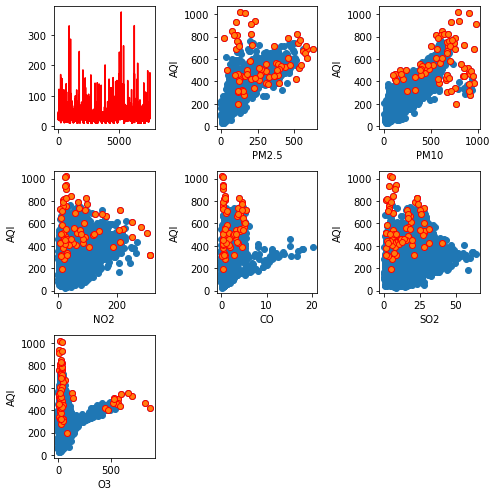

In [5]:
#knn
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import random
import math
import warnings
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)


x = df.values
plt.figure(figsize=(7,7))

plt.subplot(3,1,1)

plt.scatter(x[:,0],x[:,6])

df.info()
nbrs = NearestNeighbors(n_neighbors = 25)
nbrs.fit(x)
distances , indices = nbrs.kneighbors(x)
plt.subplot(3,3,1)

plt.plot(distances.mean(axis =1),color ="red")
plt.tight_layout()
threshold = np.percentile(df, 75)
abn_index = np.where(distances.mean(axis=1)>threshold)
plt.subplot(3,3,2)
plt.scatter(x[:,0],x[:,6])
plt.scatter(x[abn_index,0],x[abn_index,6],edgecolors='red')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

plt.subplot(3,3,3)
plt.scatter(x[:,1],x[:,6])
plt.scatter(x[abn_index,1],x[abn_index,6],edgecolors='red')
plt.xlabel('PM10')
plt.ylabel('AQI')

plt.subplot(3,3,4)
plt.scatter(x[:,2],x[:,6])
plt.scatter(x[abn_index,2],x[abn_index,6],edgecolors='red')
plt.xlabel('NO2')
plt.ylabel('AQI')

plt.subplot(3,3,5)
plt.scatter(x[:,3],x[:,6])
plt.scatter(x[abn_index,3],x[abn_index,6],edgecolors='red')
plt.xlabel('CO')
plt.ylabel('AQI')

plt.subplot(3,3,6)
plt.scatter(x[:,4],x[:,6])
plt.scatter(x[abn_index,4],x[abn_index,6],edgecolors='red')
plt.xlabel('SO2')
plt.ylabel('AQI')

plt.subplot(3,3,7)
plt.scatter(x[:,5],x[:,6])
plt.scatter(x[abn_index,5],x[abn_index,6],edgecolors='red')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
Index: 7590 entries, 2018-11-12 to 2018-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       7590 non-null   float64
 1   PM10        7590 non-null   float64
 2   NO2         7590 non-null   float64
 3   CO          7590 non-null   float64
 4   SO2         7590 non-null   float64
 5   O3          7590 non-null   float64
 6   AQI         7590 non-null   float64
 7   AQI_Bucket  7590 non-null   float64
dtypes: float64(8)
memory usage: 533.7+ KB
Outlier indices: [  44   46   63   64   71   72   74   75   76   80   90   91   98  100
  105  107  108  114  120  121  127  136  138  146  147  162  170  176
  177  178  195  196  197  198  258  267  268  269  271  272  274  278
  281  282  283  284  285  290  293  295  305  325  326  327  333  355
  598  605  608  634  652  653  654  834  842  843  844  846  847  848
  849  850  851  852  853  854  855  856  857  858  859  86

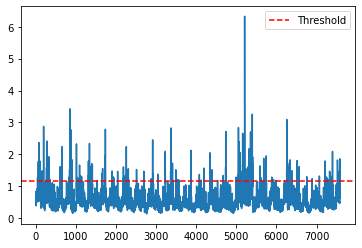

In [6]:
#KNN - 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import random
import math
import warnings
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)
# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)
df = df.dropna()
df.info()
df.index = pd.to_datetime(df.index)
normalized_df = (df - df.mean()) / df.std()

# Define the number of nearest neighbors to use
k = 5

# Fit the model and get the distances
model = NearestNeighbors(n_neighbors=k)
model.fit(normalized_df)
distances, indices = model.kneighbors(normalized_df)

# Calculate the outlier scores
outlier_scores = distances[:, k-1]

# Define the threshold for outlier detection
threshold = np.percentile(outlier_scores, 95)

# Find the outlier points
outlier_indices = np.where(outlier_scores > threshold)[0]

# Print the outlier points
print("Outlier indices:", outlier_indices)

# Plot the outlier scores
import matplotlib.pyplot as plt
plt.plot(outlier_scores)
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7590 entries, 2018-11-12 to 2018-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       7590 non-null   float64
 1   PM10        7590 non-null   float64
 2   NO2         7590 non-null   float64
 3   CO          7590 non-null   float64
 4   SO2         7590 non-null   float64
 5   O3          7590 non-null   float64
 6   AQI         7590 non-null   float64
 7   AQI_Bucket  7590 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 533.7 KB


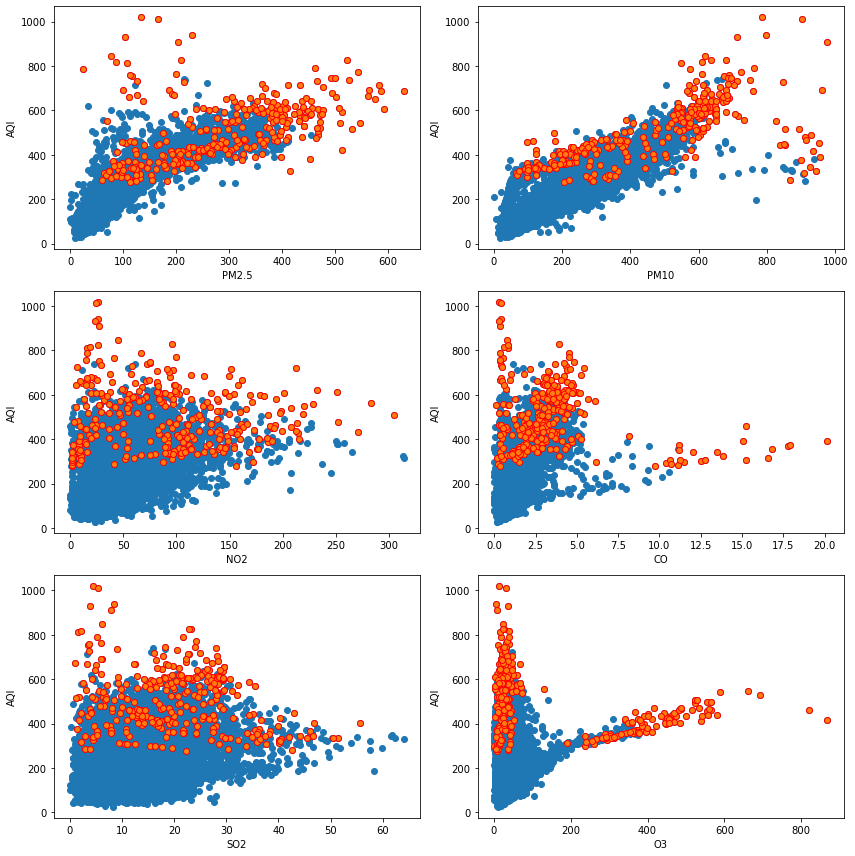

In [7]:
#isolation forest
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import math
import warnings
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)

x = df.values
df.info()

x.shape
#we have to classify things as outlier and inlier , thus:
clf = IsolationForest(contamination = .040)
clf.fit(x)
predictions = clf.predict(x)   #in the output here  we have 1s and -1s...1 = normal points , -1 = abnormal points
(predictions < 0).mean()
abn_index = np.where(predictions<0)
plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
plt.scatter(x[:,0],x[:,6])
plt.scatter(x[abn_index,0],x[abn_index,6],edgecolors='red')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

plt.subplot(3,2,2)
plt.scatter(x[:,1],x[:,6])
plt.scatter(x[abn_index,1],x[abn_index,6],edgecolors='red')
plt.xlabel('PM10')
plt.ylabel('AQI')

plt.subplot(3,2,3)
plt.scatter(x[:,2],x[:,6])
plt.scatter(x[abn_index,2],x[abn_index,6],edgecolors='red')
plt.xlabel('NO2')
plt.ylabel('AQI')

plt.subplot(3,2,4)
plt.scatter(x[:,3],x[:,6])
plt.scatter(x[abn_index,3],x[abn_index,6],edgecolors='red')
plt.xlabel('CO')
plt.ylabel('AQI')

plt.subplot(3,2,5)
plt.scatter(x[:,4],x[:,6])
plt.scatter(x[abn_index,4],x[abn_index,6],edgecolors='red')
plt.xlabel('SO2')
plt.ylabel('AQI')

plt.subplot(3,2,6)
plt.scatter(x[:,5],x[:,6])
plt.scatter(x[abn_index,5],x[abn_index,6],edgecolors='red')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.tight_layout()


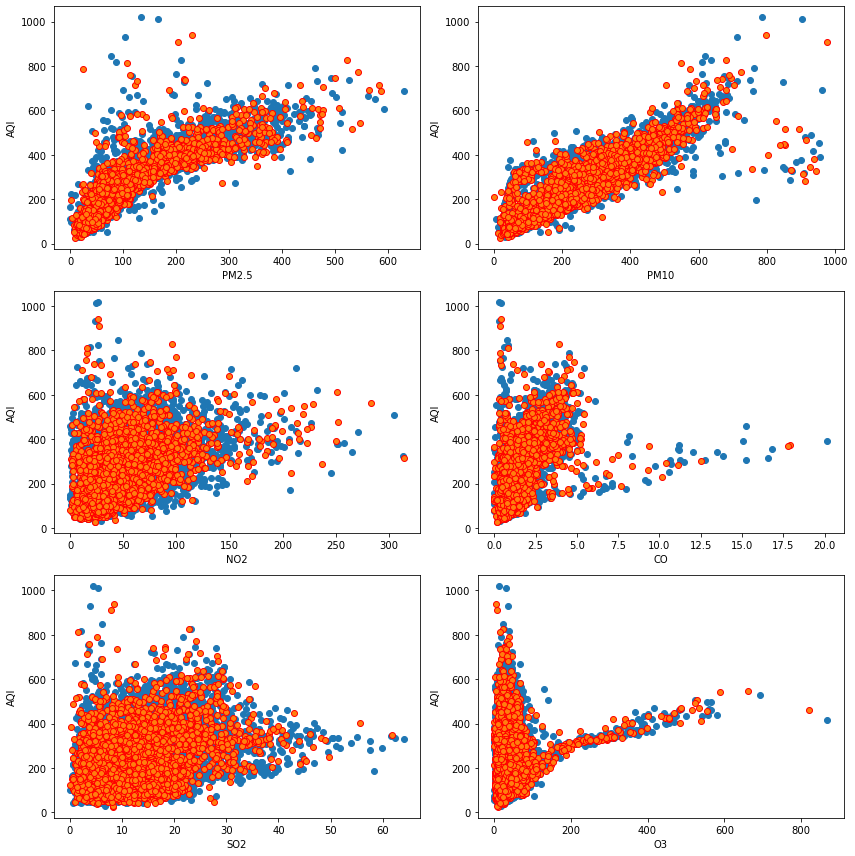

In [8]:
#isolation forest(doubt)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv', index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)

# Splitting the data into training and test sets
X_train, X_test = train_test_split(df.values, test_size= 0.33, random_state=50)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fitting the Isolation Forest model
clf = IsolationForest(contamination= 0.5, random_state=42)
clf.fit(X_train_scaled)

# Predicting the outliers
predictions = clf.predict(X_test)

# Finding the indices of the abnormal points
abn_index = np.where(predictions == -1)
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.scatter(X_train[:,0],X_train[:,6])
plt.scatter(X_test[abn_index,0],X_test[abn_index,6],edgecolors='red')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

plt.subplot(3,2,2)
plt.scatter(X_train[:,1],X_train[:,6])
plt.scatter(X_test[abn_index,1],X_test[abn_index,6],edgecolors='red')
plt.xlabel('PM10')
plt.ylabel('AQI')

plt.subplot(3,2,3)
plt.scatter(X_train[:,2],X_train[:,6])
plt.scatter(X_test[abn_index,2],X_test[abn_index,6],edgecolors='red')
plt.xlabel('NO2')
plt.ylabel('AQI')

plt.subplot(3,2,4)
plt.scatter(X_train[:,3],X_train[:,6])
plt.scatter(X_test[abn_index,3],X_test[abn_index,6],edgecolors='red')
plt.xlabel('CO')
plt.ylabel('AQI')

plt.subplot(3,2,5)
plt.scatter(X_train[:,4],X_train[:,6])
plt.scatter(X_test[abn_index,4],X_test[abn_index,6],edgecolors='red')
plt.xlabel('SO2')
plt.ylabel('AQI')

plt.subplot(3,2,6)
plt.scatter(X_train[:,5],X_train[:,6])
plt.scatter(X_test[abn_index,5],X_test[abn_index,6],edgecolors='red')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.tight_layout()


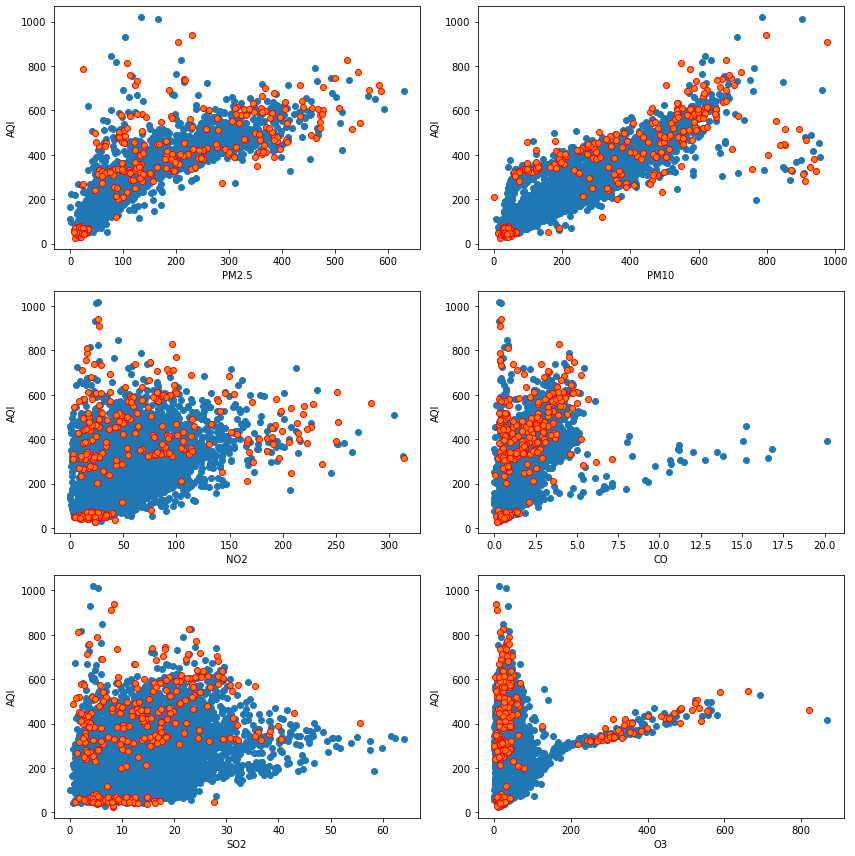

In [9]:
#SVM
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import math
import warnings
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)
X_train, X_test = train_test_split(df.values, test_size= 0.33, random_state=50)

ee = OneClassSVM(nu=0.09)
ee.fit(X_train)
predictions = ee.predict(X_test)

abn_index = np.where(predictions==-1)
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.scatter(X_train[:,0],X_train[:,6])
plt.scatter(X_test[abn_index,0],X_test[abn_index,6],edgecolors='red')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

plt.subplot(3,2,2)
plt.scatter(X_train[:,1],X_train[:,6])
plt.scatter(X_test[abn_index,1],X_test[abn_index,6],edgecolors='red')
plt.xlabel('PM10')
plt.ylabel('AQI')

plt.subplot(3,2,3)
plt.scatter(X_train[:,2],X_train[:,6])
plt.scatter(X_test[abn_index,2],X_test[abn_index,6],edgecolors='red')
plt.xlabel('NO2')
plt.ylabel('AQI')

plt.subplot(3,2,4)
plt.scatter(X_train[:,3],X_train[:,6])
plt.scatter(X_test[abn_index,3],X_test[abn_index,6],edgecolors='red')
plt.xlabel('CO')
plt.ylabel('AQI')

plt.subplot(3,2,5)
plt.scatter(X_train[:,4],X_train[:,6])
plt.scatter(X_test[abn_index,4],X_test[abn_index,6],edgecolors='red')
plt.xlabel('SO2')
plt.ylabel('AQI')

plt.subplot(3,2,6)
plt.scatter(X_train[:,5],X_train[:,6])
plt.scatter(X_test[abn_index,5],X_test[abn_index,6],edgecolors='red')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.tight_layout()


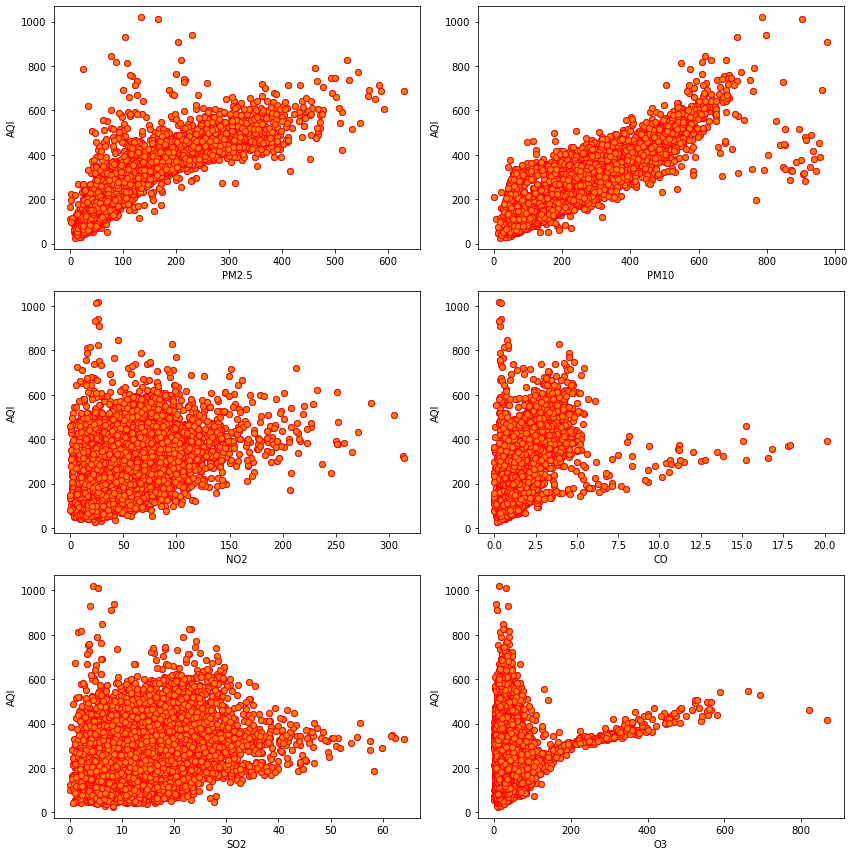

In [10]:
#DBSCAN(doubt)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import math
import warnings
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)

x = df.values
db = DBSCAN(algorithm='auto', eps=0.33, leaf_size=30, metric='euclidean',metric_params=None, min_samples=50, n_jobs=None, p=None)
pred = db.fit_predict(x)
abn_index = np.where(pred == -1)
plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
plt.scatter(x[:,0],x[:,6])
plt.scatter(x[abn_index,0],x[abn_index,6],edgecolors='red')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

plt.subplot(3,2,2)
plt.scatter(x[:,1],x[:,6])
plt.scatter(x[abn_index,1],x[abn_index,6],edgecolors='red')
plt.xlabel('PM10')
plt.ylabel('AQI')

plt.subplot(3,2,3)
plt.scatter(x[:,2],x[:,6])
plt.scatter(x[abn_index,2],x[abn_index,6],edgecolors='red')
plt.xlabel('NO2')
plt.ylabel('AQI')

plt.subplot(3,2,4)
plt.scatter(x[:,3],x[:,6])
plt.scatter(x[abn_index,3],x[abn_index,6],edgecolors='red')
plt.xlabel('CO')
plt.ylabel('AQI')

plt.subplot(3,2,5)
plt.scatter(x[:,4],x[:,6])
plt.scatter(x[abn_index,4],x[abn_index,6],edgecolors='red')
plt.xlabel('SO2')
plt.ylabel('AQI')

plt.subplot(3,2,6)
plt.scatter(x[:,5],x[:,6])
plt.scatter(x[abn_index,5],x[abn_index,6],edgecolors='red')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.tight_layout()


Text(0, 0.5, 'AQI')

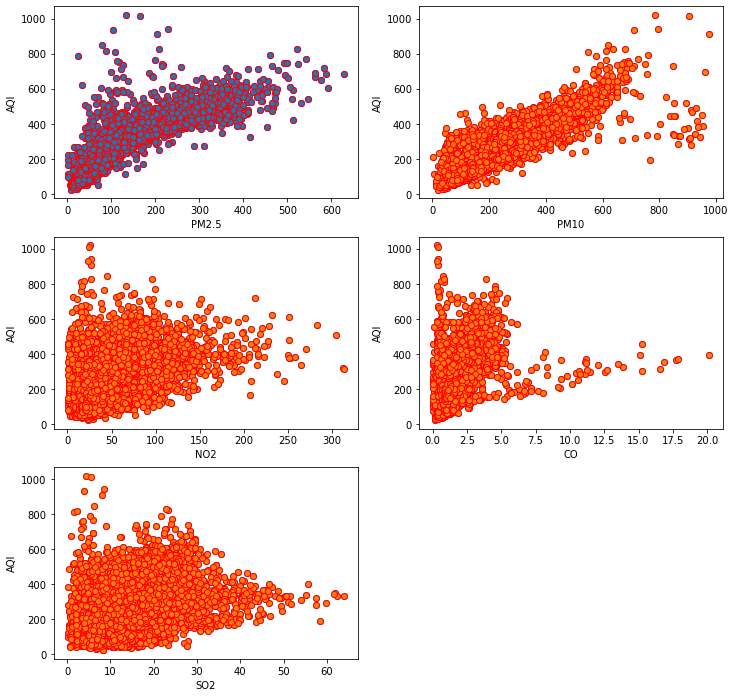

In [11]:
#DB-2(doubt)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import math
import warnings
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)

x = df.values
db = DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',metric_params=None, min_samples=20, n_jobs=None, p=None)
pred = db.fit_predict(x)
abn_index = np.where(pred == -1)
plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
plt.scatter(x[:,0],x[:,6],color ='blue')
plt.scatter(x[abn_index[0],0],x[abn_index[0],6],edgecolors='red')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

plt.subplot(3,2,2)
plt.scatter(x[:,1],x[:,6])
plt.scatter(x[abn_index[0],1],x[abn_index[0],6],edgecolors='red')
plt.xlabel('PM10')
plt.ylabel('AQI')

plt.subplot(3,2,3)
plt.scatter(x[:,2],x[:,6])
plt.scatter(x[abn_index[0],2],x[abn_index[0],6],edgecolors='red')
plt.xlabel('NO2')
plt.ylabel('AQI')

plt.subplot(3,2,4)
plt.scatter(x[:,3],x[:,6])
plt.scatter(x[abn_index[0],3],x[abn_index[0],6],edgecolors='red')
plt.xlabel('CO')
plt.ylabel('AQI')

plt.subplot(3,2,5)
plt.scatter(x[:,4],x[:,6])
plt.scatter(x[abn_index[0],4],x[abn_index[0],6],edgecolors='red')
plt.xlabel('SO2')
plt.ylabel('AQI')

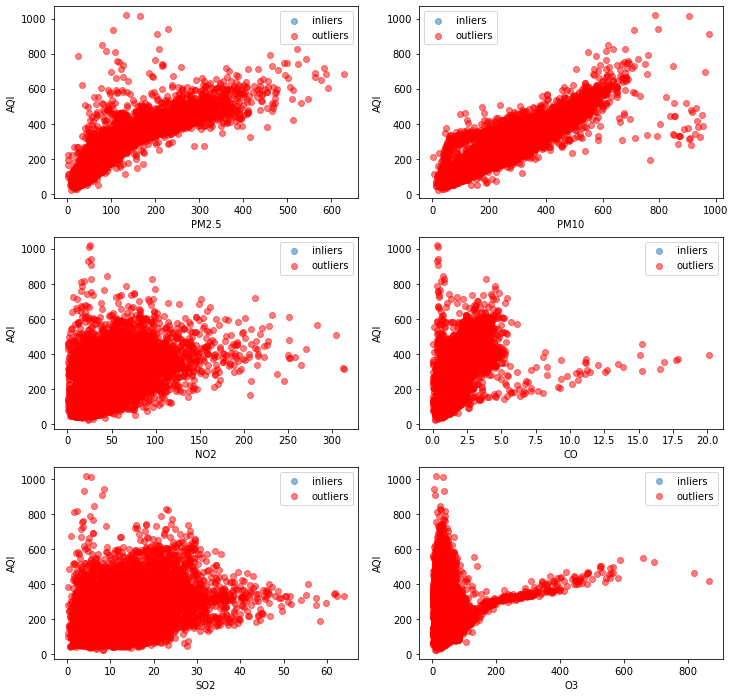

In [12]:
#DB-3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import math
import warnings
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)

x = df.values
db = DBSCAN(algorithm='auto', eps=0.28, leaf_size=30, metric='euclidean',metric_params=None, min_samples=200, n_jobs=None, p=None)
pred = db.fit_predict(x)

# Separating outliers and inliers
outliers = x[pred == -1]
inliers = x[pred != -1]

plt.figure(figsize=(12, 12))

# Plotting PM2.5 vs AQI
plt.subplot(3, 2, 1)
plt.scatter(inliers[:, 0], inliers[:, 6], alpha=0.5, label='inliers')
plt.scatter(outliers[:, 0], outliers[:, 6], color='red', alpha=0.5, label='outliers')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.legend()

# Plotting PM10 vs AQI
plt.subplot(3, 2, 2)
plt.scatter(inliers[:, 1], inliers[:, 6], alpha=0.5, label='inliers')
plt.scatter(outliers[:, 1], outliers[:, 6], color='red', alpha=0.5, label='outliers')
plt.xlabel('PM10')
plt.ylabel('AQI')
plt.legend()

# Plotting NO2 vs AQI
plt.subplot(3, 2, 3)
plt.scatter(inliers[:, 2], inliers[:, 6], alpha=0.5, label='inliers')
plt.scatter(outliers[:, 2], outliers[:, 6], color='red', alpha=0.5, label='outliers')
plt.xlabel('NO2')
plt.ylabel('AQI')
plt.legend()

# Plotting CO vs AQI
plt.subplot(3, 2, 4)
plt.scatter(inliers[:, 3], inliers[:, 6], alpha=0.5, label='inliers')
plt.scatter(outliers[:, 3], outliers[:,  6], color='red', alpha=0.5, label='outliers')
plt.xlabel('CO')
plt.ylabel('AQI')
plt.legend()

# Plotting SO2 vs AQI
plt.subplot(3, 2, 5)
plt.scatter(inliers[:, 4], inliers[:, 6], alpha=0.5, label='inliers')
plt.scatter(outliers[:, 4], outliers[:,  6], color='red', alpha=0.5, label='outliers')
plt.xlabel('SO2')
plt.ylabel('AQI')
plt.legend()

# Plotting O3 vs AQI
plt.subplot(3, 2, 6)
plt.scatter(inliers[:, 5], inliers[:, 6], alpha=0.5, label='inliers')
plt.scatter(outliers[:, 5], outliers[:,  6], color='red', alpha=0.5, label='outliers')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()

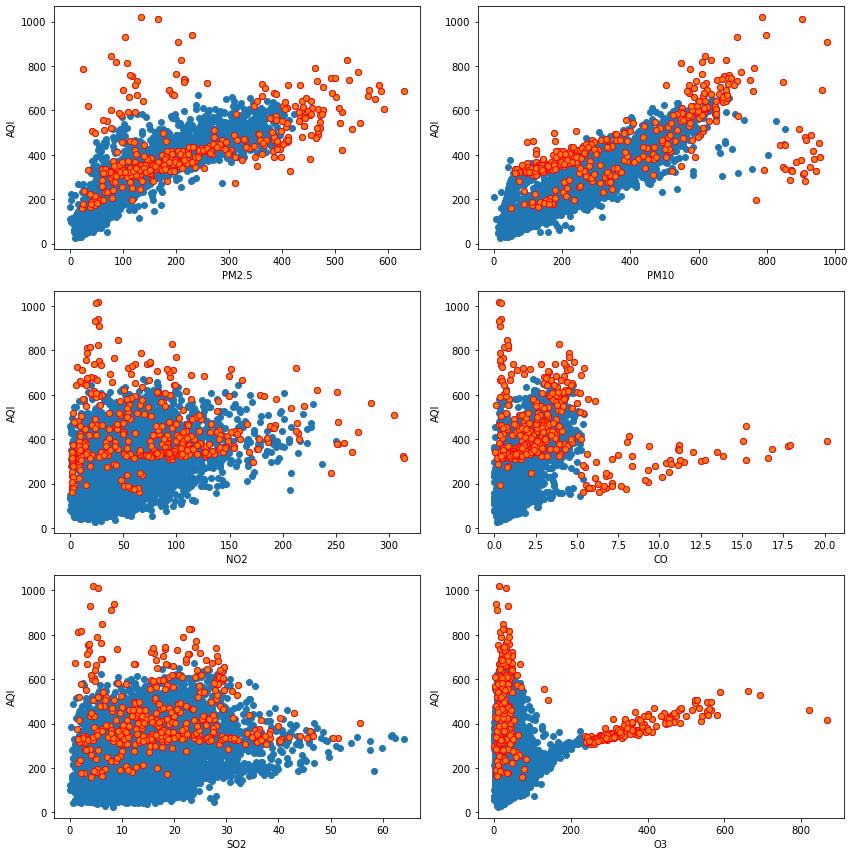

In [13]:
#EllipticalEnvelope
import os
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st
import math
import warnings
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
from sklearn.covariance import EllipticEnvelope

warnings.filterwarnings('ignore')
%matplotlib inline

# Downloading data and reading CSV
urlretrieve('https://raw.githubusercontent.com/Aahna1909/data-Analysis-AQI/main/Sample.csv%20-%20Sheet1.csv', '2018.csv')
df = pd.read_csv('2018.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

# Removing unnecessary columns
df.drop(['StationId', 'NO', 'NOx', 'NH3', 'Benzene', 'Xylene', 'Toluene'], axis=1, inplace=True)

# Removing rows with missing values
df = df.dropna()

# Mapping AQI_Bucket to numerical values
aqi_map = {'Good': 0, 'Satisfactory': 1, 'Moderate': 2, 'Poor': 3, 'Very Poor': 4,'Severe': 5}
df['AQI_Bucket'] = df['AQI_Bucket'].map(aqi_map)

x = df.values
elenv = EllipticEnvelope(assume_centered=False, contamination= 0.05, random_state=None,store_precision=True, support_fraction=None)
pred = elenv.fit_predict(x)
abn_index = np.where(pred == -1)
plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
plt.scatter(x[:,0],x[:,6])
plt.scatter(x[abn_index,0],x[abn_index,6],edgecolors='red')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

plt.subplot(3,2,2)
plt.scatter(x[:,1],x[:,6])
plt.scatter(x[abn_index,1],x[abn_index,6],edgecolors='red')
plt.xlabel('PM10')
plt.ylabel('AQI')

plt.subplot(3,2,3)
plt.scatter(x[:,2],x[:,6])
plt.scatter(x[abn_index,2],x[abn_index,6],edgecolors='red')
plt.xlabel('NO2')
plt.ylabel('AQI')

plt.subplot(3,2,4)
plt.scatter(x[:,3],x[:,6])
plt.scatter(x[abn_index,3],x[abn_index,6],edgecolors='red')
plt.xlabel('CO')
plt.ylabel('AQI')

plt.subplot(3,2,5)
plt.scatter(x[:,4],x[:,6])
plt.scatter(x[abn_index,4],x[abn_index,6],edgecolors='red')
plt.xlabel('SO2')
plt.ylabel('AQI')

plt.subplot(3,2,6)
plt.scatter(x[:,5],x[:,6])
plt.scatter(x[abn_index,5],x[abn_index,6],edgecolors='red')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.tight_layout()
